# UNSW-NB 15 Dataset ML Methods Comparison Notebook - Attack Type Classification 

This notebook will implement several machine learning methods:

- Logistic Regression
- Decision Trees
- Random Forest
- Neural Networks: we will use Multi-layer perceptron.

We will illustrate them and compare their performances the The raw network packets of the UNSW-NB 15 dataset was created by the IXIA PerfectStorm tool in the Cyber Range Lab of the Australian Centre for Cyber Security (ACCS) for generating a hybrid of real modern normal activities and synthetic contemporary attack behaviours. Further information found at https://www.unsw.adfa.edu.au/unsw-canberra-cyber/cybersecurity/ADFA-NB15-Datasets/



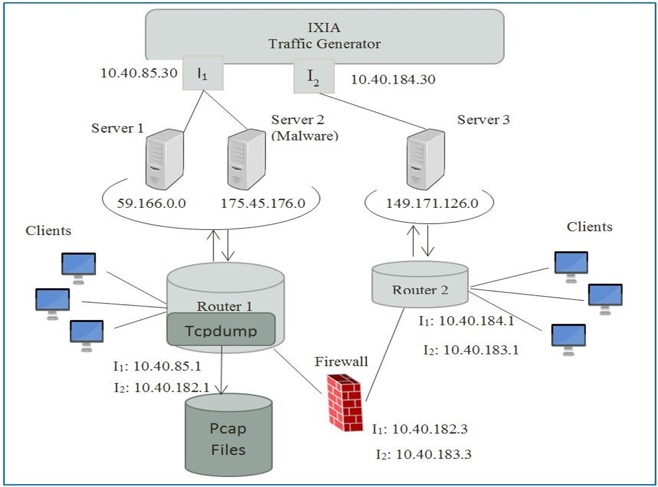









Tcpdump tool is utilised to capture 100 GB of the raw traffic (e.g., Pcap files). This dataset has nine types of attacks, namely, Fuzzers, Analysis, Backdoors, DoS, Exploits, Generic, Reconnaissance, Shellcode and Worms. The Argus, Bro-IDS tools are used and twelve algorithms are developed to generate totally 49 features with the class label.

These features are described in UNSW-NB15_features.csv file.

A partition from this dataset is configured as a training set and testing set, namely, UNSW_NB15_training-set.csv and UNSW_NB15_testing-set.csv respectively.

The number of records in the training set is 175,341 records and the testing set is 82,332 records from the different types, attack and normal.Figure 1 and 2 show the testbed configuration dataset and the method of the feature creation of the UNSW-NB15, respectively.

The details of the UNSW-NB15 dataset are published in following the papers:

Moustafa, Nour, and Jill Slay. "UNSW-NB15: a comprehensive data set for network intrusion detection systems (UNSW-NB15 network data set)." Military Communications and Information Systems Conference (MilCIS), 2015. IEEE, 2015.
Moustafa, Nour, and Jill Slay. "The evaluation of Network Anomaly Detection Systems: Statistical analysis of the UNSW-NB15 dataset and the comparison with the KDD99 dataset." Information Security Journal: A Global Perspective (2016): 1-14.
Moustafa, Nour, et al. . "Novel geometric area analysis technique for anomaly detection using trapezoidal area estimation on large-scale networks." IEEE Transactions on Big Data (2017).
Moustafa, Nour, et al. "Big data analytics for intrusion detection system: statistical decision-making using finite dirichlet mixture models." Data Analytics and Decision Support for Cybersecurity. Springer, Cham, 2017. 127-156.


For more information, please contact the authors: Harshil Patel & Yuesheng Chen are a students in Industrial Engineering at Ohio State University, and they are interested in new Cyber threat intelligence approaches and the technology of Industry 4.0. 

In this notebook, the operations conducted include:

- Preprocessing the data to prepare for training ML models.
- Training ML models based on cross-validation.
- Evaluating ML models based on testing data.

# Libraries

Import libararies to implement the described machine learning methods using a few different `sklearn` algorithms.

In [1]:
# data cleaning and plots
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# sklearn: data preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

# sklearn: train model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, classification_report

# sklearn classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# Data Processing

## Load Data

**UNSW-NB15: a comprehensive data set for network intrusion detection systems**

These features are described in UNSW-NB15_features.csv file.

A partition from this dataset is configured as a training set and testing set, namely, UNSW_NB15_training-set.csv and UNSW_NB15_testing-set.csv respectively.

The number of records in the training set is 175,341 records and the testing set is 82,332 records from the different types, attack and normal.Figure 1 and 2 show the testbed configuration dataset and the method of the feature creation of the UNSW-NB15, respectively. The addtional features are as described in UNSW-NB15_features.csv file.


## Response Variable:

attack_cat: This dataset has nine types of attacks, namely, Fuzzers, Analysis, Backdoors, DoS, Exploits, Generic, Reconnaissance, Shellcode and Worms.

Label: 0 for normal and 1 for attack records


In [2]:
# Load data
initial_data = pd.read_csv('UNSW_NB15_training.csv')

In [3]:
# Look at the first 5 rows
initial_data.head(n=5)

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.121478,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,...,1,1,0,0,0,1,1,0,Normal,0
1,0.649902,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,...,1,2,0,0,0,1,6,0,Normal,0
2,1.623129,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,...,1,3,0,0,0,2,6,0,Normal,0
3,1.681642,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,...,1,3,1,1,0,2,1,0,Normal,0
4,0.449454,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,...,1,40,0,0,0,2,39,0,Normal,0


In [4]:
# information of the data: 583 data points, 10 features' columns and 1 target column
initial_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 41 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                175341 non-null  float64
 1   spkts              175341 non-null  int64  
 2   dpkts              175341 non-null  int64  
 3   sbytes             175341 non-null  int64  
 4   dbytes             175341 non-null  int64  
 5   rate               175341 non-null  float64
 6   sttl               175341 non-null  int64  
 7   dttl               175341 non-null  int64  
 8   sload              175341 non-null  float64
 9   dload              175341 non-null  float64
 10  sloss              175341 non-null  int64  
 11  dloss              175341 non-null  int64  
 12  sinpkt             175341 non-null  float64
 13  dinpkt             175341 non-null  float64
 14  sjit               175341 non-null  float64
 15  djit               175341 non-null  float64
 16  sw

## Tidy Data

### Check missing values
First, we should check if there are missing values in the dataset. 

In [5]:
# check if there are Null values
initial_data.isnull().sum()

dur                  0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat           0
label                0
dtype: int64

A basic strategy to use incomplete datasets is to discard entire rows and/or columns containing missing values. Actually, there exists some strategies to impute missing values (see [here](https://scikit-learn.org/stable/modules/impute.html)). For simplicity, we will discard the four rows with missing values. 

In [6]:
# Discard the rows with missing values
data_to_use = initial_data.dropna()

# Shape of the data: we could see that the number of rows remains the same as no null values were reported
data_to_use.shape

(175341, 41)

### Check imbalanced issue on y

First, we get the `X` and `y1` and `y2` .

In [7]:
X = data_to_use.drop(axis=1, columns=['attack_cat']) # X is a dataframe
X = X.drop(axis=1, columns=['label'])

y1 = data_to_use['attack_cat'].values # y is an array
y2 = data_to_use['label'].values

In [8]:
# Calculate Y2 ratio
def data_ratio(y2):
    '''
    Calculate Y2's ratio
    '''
    unique, count = np.unique(y2, return_counts=True)
    ratio = round(count[0]/count[1], 1)
    return f'{ratio}:1 ({count[0]}/{count[1]})'

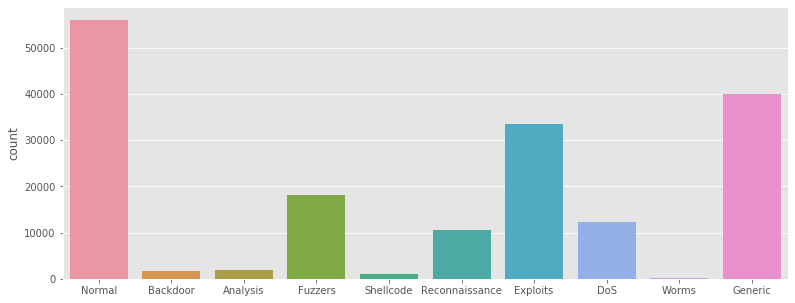

The class ratio for the original data: 0.5:1 (56000/119341)


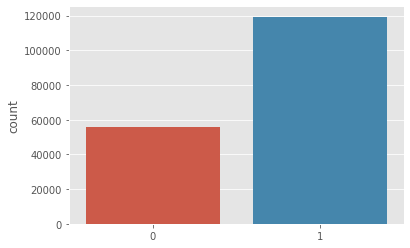

In [9]:
plt.figure(figsize=(13,5))
sns.countplot(y1,label="Sum")
plt.show()

print('The class ratio for the original data:', data_ratio(y2))
sns.countplot(y2,label="Sum")
plt.show()

We could see that the dataset is not perfectly balanced. There are some sampling techniques to deal with this issue. Here, we ignore this issue because we are aimed to implement several ML models to compare their performance. 

### Split training and testing data

It is important to split `X` and `y` as training set and testing set. Here, we will split the original data as 70% training set and 30% testing set. But the partition action from this dataset was pre configured as a training set and testing set, namely, UNSW_NB15_training-set.csv and UNSW_NB15_testing-set.csv respectively.

The number of records in the training set is 175,341 records and the testing set is 82,332 records from the different types, attack and normal.Figure 1 and 2 show the testbed configuration dataset and the method of the feature creation of the UNSW-NB15, respectively.

Thus the follwing code will not be utilized

In [10]:
#X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.3, random_state=1)
#print('The class ratio in training data: ', data_ratio(y1_train))
#print('The class ratio in testing data: ', data_ratio(y1_test))

We will convert the orginal training data to the datframes called X_train, y1_train, y2_train

In [11]:
# Load data
test_data = pd.read_csv('UNSW_NB15_testing.csv')
X_test = test_data.drop(axis=1, columns=['attack_cat']) # X_test is a dataframe
X_test = X_test.drop(axis=1, columns=['label'])

y1_test = test_data['attack_cat'].values # y is an array
y2_test = test_data['label'].values
X_train = X
y1_train = y1
y2_train = y2

### Transform training and testing data

#### Transformation on X_train, X_test

Scikit-learn provides a library of transformers. Like other estimators, these are represented by classes with a `fit` method, which learns model parameters (e.g. mean and standard deviation for normalization) from a training set, and a `transform` method which applies this transformation model to unseen data. 

**NOTE: The reason of performing transformation after splitting the original data is that we will `fit` those parameters on training set**.

In addition, it is very common to want to perform different data transformation techniques on different columns in your input data. The `ColumnTransformer` is a class in the scikit-learn library that allows you to selectively apply data preparation transforms. For example, it allows you to apply a specific transform or sequence of transforms to just the numerical columns, and a separate sequence of transforms to just the categorical columns.

In our case, we need to perform `OneHotEncoder` on `Gender` column because it is categorical, and perform `StandardScaler` on other numerical columns.

- `OneHotEncoder`: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
- `StandardScaler`: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

First, we find out which columns are categorical and which are numerical.

In [12]:
# determine categorical and numerical columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'bool']).columns

In [13]:
numerical_cols

Index(['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl',
       'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit',
       'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean',
       'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports'],
      dtype='object')

In [14]:
categorical_cols

Index([], dtype='object')

Then, we construct the `ColumnTransformer` object, and then fit it on training data.

In [15]:
# define the transformation methods for the columns
t = [('ohe', OneHotEncoder(drop='first'), categorical_cols),
    ('scale', StandardScaler(), numerical_cols)]

col_trans = ColumnTransformer(transformers=t)

# fit the transformation on training data
col_trans.fit(X_train)

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('ohe',
                                 OneHotEncoder(categories='auto', drop='first',
                                               dtype=<class 'numpy.float64'>,
                                               handle_unknown='error',
                                               sparse=True),
                                 Index([], dtype='object')),
                                ('scale',
                                 StandardScaler(copy=True, with_mean=True,
                                                with_std=True),
                                 Index(['dur', 'spkts', 'dpkts', 'sbytes...
       'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit',
       'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean',
       'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_s

In [16]:
X_train_transform = col_trans.transform(X_train)

In [17]:
# apply transformation to both training and testing data 
# fit the transformation on training data

In [18]:
X_test_transform = col_trans.transform(X_test)

We could look at the transformed training data. It becomes an array-like structure rather than a dataframe structure.

In [19]:
# look at the transformed training data
X_train_transform.shape

(175341, 39)

In [20]:
X_test_transform.shape

(82332, 39)

#### Transformation on y_train and y_test

`LabelEncoder` is a utility class to help normalize labels such that they contain only values between 0 and n_classes-1.  Although it should be much easier to achieve this by subtracting 1 from the `y` array, we provide the `LabelEncoder` transformation which is a standard way of dealing with targeted values. Again, similar to the transformation on `X`, we will apply `fit` method to `y_train` and then apply `transform` method to both `y_train` and `y_test`.  

In [21]:
# Note that the distinct values/labels in `y2` target are 1 and 2. 
pd.unique(y1)

array(['Normal', 'Backdoor', 'Analysis', 'Fuzzers', 'Shellcode',
       'Reconnaissance', 'Exploits', 'DoS', 'Worms', 'Generic'],
      dtype=object)

In [22]:
# Define a LabelEncoder() transformation method and fit on y1_train
target_trans = LabelEncoder()
target_trans.fit(y1_train)

LabelEncoder()

In [23]:
# apply transformation method on y1_train and y1_test
y1_train_transform = target_trans.transform(y1_train)
y1_test_transform = target_trans.transform(y1_test)

In [24]:
# view the transformed y1_train
y1_train_transform

array([6, 6, 6, ..., 5, 5, 5])

# Train ML Models

We will train several machine learning models for the training set and evaluate their performance on both training and testing set. Before doing this, let's first go through a standard procedure of training a certain classifier.

## Steps of Training Model

- Step 1: Train a ML model and validate it via 5-fold cross-validation (CV). The CV results will show how good the model has been trained by using the training data given a set of hyperparameters in the ML model. The metrics of evaluating a model include accuracy, precision, recall, F1 score, AUC value of ROC. 


- Step 2: Evaluate the model by using the testing data. It will show how good the model could be used to make predictions for unseen data.

**NOTE: For simplicity, we do not tune hyperparameters in the ML model and will use the default settings of hyperparameters in each ML model.**

**Let's firstly train a `Logistic Regression` model with regards to Step 1 and Step 2.** using `y2` as the response feature

In [25]:
# ===== Step 1: cross-validation ========
# define a Logistic Regression classifier
clf = LogisticRegression(solver='lbfgs', random_state=123, max_iter = 4000, multi_class = "ovr")

# define  Stratified 5-fold cross-validator, it provides train/validate indices to split data in train/validate sets.
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

# define metrics for evaluating
scoring = ['accuracy', 'precision_micro', 'recall_micro', 'f1_micro', 'roc_auc_ovr']  

# perform the 5-fold CV and get the metrics results
cv_results = cross_validate(estimator=clf,
                            X=X_train_transform,
                            y=y1_train_transform,
                            scoring=scoring,
                            cv=cv,
                            return_train_score=False) # prevent to show the train scores on cv splits.

In [26]:
cv_results

{'fit_time': array([46.52551913, 46.13455844, 45.49327564, 48.61202908, 47.50389528]),
 'score_time': array([0.11868143, 0.13563681, 0.13164687, 0.12666082, 0.12466574]),
 'test_accuracy': array([0.73640537, 0.73836546, 0.74098894, 0.74144519, 0.73910688]),
 'test_precision_micro': array([0.73640537, 0.73836546, 0.74098894, 0.74144519, 0.73910688]),
 'test_recall_micro': array([0.73640537, 0.73836546, 0.74098894, 0.74144519, 0.73910688]),
 'test_f1_micro': array([0.73640537, 0.73836546, 0.74098894, 0.74144519, 0.73910688]),
 'test_roc_auc_ovr': array([0.93437068, 0.93130367, 0.93474574, 0.93328961, 0.93418253])}

The CV results include: 

- `test_score`: The score array for test scores on each cv split. Suffix `_score` in `test_score` changes to a specific metric like `test_accuracy` or `test_f1` if there are multiple scoring metrics in the scoring parameter.

- `fit_time`: The time for fitting the estimator on the train set for each cv split.

- `score_time`: The time for scoring the estimator on the test set for each cv split. 

**Typically, we will use the mean value of each metric to represent the evaluation results of cross-validation.** For example, we could calculate the mean value of the `accuracy` score: 

In [27]:
cv_results['test_accuracy'].mean()

0.7392623679401604

**In addition, the cross-validation step is used to find the best set of hyperparameters which give the "best" scores of metrics.** Since we do not tune hyperparameters in this case, we then directly fit the Logistic Regression model by using the default values of hyperparameters and evaluate it on testing data.

In [ ]:
# ======== Step 2: Evaluate the model using testing data =======

# fit the Logistic Regression model
clf.fit(X=X_train_transform, y=y1_train_transform)

# predition on testing data
y_pred_class = clf.predict(X=X_test_transform)
y_pred_score = clf.predict_proba(X=X_test_transform)[:, 1]


In [29]:
# ======== Step 2: Evaluate the model using testing data =======

# fit the Logistic Regression model
clf.fit(X=X_train_transform, y=y1_train_transform)

# predition on testing data
y_pred_class = clf.predict(X=X_test_transform)
y_pred_score = clf.predict_proba(X=X_test_transform)[:, 1]

# AUC of ROC
#auc_ontest = roc_auc_score(y_true=y1_test_transform, y_score=y_pred_score, average='micro', multi_class='ovr', max_fpr = 'None' )
# confusion matrix
cm_ontest = confusion_matrix(y_true=y1_test_transform, y_pred=y_pred_class)
# precision score
precision_ontest = precision_score(y_true=y1_test_transform, y_pred=y_pred_class, average='micro')
# recall score
recall_ontest = recall_score(y_true=y1_test_transform, y_pred=y_pred_class, average='micro')
# classifition report
cls_report_ontest = classification_report(y_true=y1_test_transform, y_pred=y_pred_class)

# print the above results
#print('The model scores {:1.5f} ROC AUC on the test set.'.format(auc_ontest))
print('The precision score on the test set: {:1.5f}'.format(precision_ontest))
print('The recall score on the test set: {:1.5f}'.format(recall_ontest))
print('Confusion Matrix:\n', cm_ontest)
# Print classification report:
print('Classification Report:\n', cls_report_ontest)

The precision score on the test set: 0.63334
The recall score on the test set: 0.63334
Confusion Matrix:
 [[    0     0     5   190    24   189   267     2     0     0]
 [    0     0     5   104    44   189   221    20     0     0]
 [    0     0    61  3004   242   260   321   201     0     0]
 [   16     0    46  8443  1102   437   784   304     0     0]
 [    0     0    16   708  3180   403  1651   104     0     0]
 [    0     0     9  1421   222 16507   641    71     0     0]
 [  166     0    45  3708  9592   293 22347   831    18     0]
 [    0     0     6  1373   404    10    97  1606     0     0]
 [    0     0     0   125    92     0    14   147     0     0]
 [    0     0     0    23    13     6     1     1     0     0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       677
           1       0.00      0.00      0.00       583
           2       0.32      0.01      0.03      4089
           3       0.4

D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
# AUC of ROC
auc_ontest = roc_auc_score(y_true=y1_test_transform, y_score=y_pred_score, average='micro', multi_class='ovr', max_fpr = 'None' )

ValueError: Partial AUC computation not available in multiclass setting, 'max_fpr' must be set to `None`, received `max_fpr=None` instead

Through the above steps, we could assess if the trained model is good for making predictions on unseen data. Recall that we are training a ML model to classify types of attack behavior on network packets. Considering that we prefer to having a model to capture the cases of attack as many as possible. In other words, the favorable model could have relatively high "coverage" ability and high "precision" ability. **Therefore, we could choose `F1 score` as the evaluation metric in this case. `F1 score` can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.** 

## Several ML Models

We will implement several ML models through the above steps. The only difference part is to change `clf = LogisticRegression()` as other model functions, for example, `clf = DecisionTreeClassifier()`. 

The followings are ML models functions: 

- `LogisticRegression()`
- `DecisionTreeClassifier()`
- `RandomForestClassifier()`
- `MLPClassifier()`

Note that in `MLPClassifier()` we set the solver as `adam` which has better performance for big data. Also, we set the maximum iterations as 8000 to ensure convergence. `random_state` is used to ensure reproducible results.

In [31]:
# Define four models
models = [('LogisticRegression', LogisticRegression(random_state=123, max_iter=5000, multi_class = "ovr")),
          ('DecisionTree', DecisionTreeClassifier(random_state=123)),
          ('RandomForest', RandomForestClassifier(random_state=123)),
          #('MultiLayerPerceptron', MLPClassifier(random_state=123, solver='adam', max_iter=8000))
         ]

We could check the hyperparameters values in these models: 

In [32]:
for model_name, clf in models:
    print(clf)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_

**Finally, we write the code to perform the above four ML models and store their cross-validation results and evaluation results on testing data.**

In [33]:
# define several lists and dataframe to store the CV results and evaluation results on testing data
model_names_list = []
cv_fit_time_mean_list = []
cv_accuracy_mean_list = []
cv_precision_mean_list = []
cv_recall_mean_list = []
cv_f1_mean_list = []
#cv_roc_auc_mean_list = []

test_accuracy_list = []
test_precision_list = []
test_recall_list = []
test_f1_list = []
#test_roc_auc_list = []

#test_roc_curve_df = pd.DataFrame()


for model_name, clf in models:
    
    # ==== Step 1: Cross-validation =====
    
    # define  Stratified 5-fold cross-validator
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
    # define metrics for evaluating
    scoring = ['accuracy', 'precision_micro', 'recall_micro', 'f1_micro']
    # perform the 5-fold CV and get the metrics results
    cv_results = cross_validate(estimator=clf,
                                X=X_train_transform,
                                y=y1_train_transform,
                                scoring=scoring,
                                cv=cv,
                                return_train_score=False)  # prevent to show the train scores on cv splits.

    # calculate the mean values of those scores
    cv_fit_time_mean = cv_results['fit_time'].mean()
    cv_accuracy_mean = cv_results['test_accuracy'].mean()
    cv_precision_mean = cv_results['test_precision_micro'].mean()
    cv_recall_mean = cv_results['test_recall_micro'].mean()
    cv_f1_mean = cv_results['test_f1_micro'].mean()
    #cv_roc_auc_mean = cv_results['test_roc_auc_ovr'].mean()

    # store CV results into those lists
    model_names_list.append(model_name)
    cv_fit_time_mean_list.append(cv_fit_time_mean)
    cv_accuracy_mean_list.append(cv_accuracy_mean)
    cv_precision_mean_list.append(cv_precision_mean)
    cv_recall_mean_list.append(cv_recall_mean)
    cv_f1_mean_list.append(cv_f1_mean)
    #cv_roc_auc_mean_list.append(cv_roc_auc_mean)

    # ==== Step 2: Evaluation on Testing data =====

    # fit model
    clf.fit(X=X_train_transform, y=y1_train_transform)

    # predition on testing data
    
    # predicted label or class
    y_pred_class = clf.predict(X=X_test_transform)  
    
    # predicted probability of the label 1
    y_pred_score = clf.predict_proba(X=X_test_transform)[:, 1]

    # accuracy
    accuracy_ontest = accuracy_score(y_true=y1_test_transform, y_pred=y_pred_class)
    
    # auc of ROC
    #auc_ontest = roc_auc_score(y_true=y1_test_transform, y_score=y_pred_score, average = 'micro', multi_class = 'ovr')
    
    # precision score
    precision_ontest = precision_score(y_true=y1_test_transform, y_pred=y_pred_class, average = 'micro')
    
    # recall score
    recall_ontest = recall_score(y_true=y1_test_transform, y_pred=y_pred_class, average = 'micro')
    
    # F1 score
    f1_ontest = f1_score(y_true=y1_test_transform, y_pred=y_pred_class, average = 'micro')
    
    # roc curve dataframe
    #fpr, tpr, threshold_roc = roc_curve(y_true=y1_test_transform, y_score=y_pred_score)
    
    #roc_df = pd.DataFrame(list(zip(fpr, tpr, threshold_roc)),
                          #columns=['False Positive Rate', 'True Positive Rate', 'Threshold'])
    
    #roc_df['Model'] = '{} (AUC = {:.3f})'.format(model_name, auc_ontest)


    # store the above values
    test_accuracy_list.append(accuracy_ontest)
    #test_roc_auc_list.append(auc_ontest)
    test_precision_list.append(precision_ontest)
    test_recall_list.append(recall_ontest)
    test_f1_list.append(f1_ontest)
    
    #test_roc_curve_df = pd.concat([test_roc_curve_df, roc_df],
                                 #ignore_index=True)

### Model Comparison

We've stored CV results and evaluation results of testing data for the three ML models. Then, we could create a dataframe to view them.

In [37]:
results_dict1 = {'Model Name': model_names_list,
                'CV Fit Time': cv_fit_time_mean_list,
                'CV Accuracy mean': cv_accuracy_mean_list,
                'CV Precision mean': cv_precision_mean_list,
                'CV Recall mean': cv_recall_mean_list,
                'CV F1 mean': cv_f1_mean_list,
                #'CV AUC mean': cv_roc_auc_mean_list,
                'Test Accuracy': test_accuracy_list,
                'Test Precision': test_precision_list,
                'Test Recall': test_recall_list,
                'Test F1': test_f1_list,
                #'Test AUC': test_roc_auc_list
                }

results1_df = pd.DataFrame(results_dict1)

# sort the results according to F1 score on testing data
results1_df.sort_values(by='Test F1', ascending=False)

,Model Name,CV Fit Time,CV Accuracy mean,CV Precision mean,CV Recall mean,CV F1 mean,Test Accuracy,Test Precision,Test Recall,Test F1
2,RandomForest,21.654151,0.828141,0.828141,0.828141,0.828141,0.756255,0.756255,0.756255,0.756255
1,DecisionTree,1.868607,0.809594,0.809594,0.809594,0.809594,0.738935,0.738935,0.738935,0.738935
0,LogisticRegression,44.287026,0.739262,0.739262,0.739262,0.739262,0.633338,0.633338,0.633338,0.633338


## ML Models: MLPClassifier

Note that in `MLPClassifier()` we set the solver as `adam` which has better performance for big data. Also, we set the maximum iterations as 8000 to ensure convergence. `random_state` is used to ensure reproducible results.

In [38]:
# Define MLP Classifier 
MLPmodel = [('MultiLayerPerceptron', MLPClassifier(random_state=123, solver='adam', max_iter=8000))]

In [39]:
for model_name, clf in MLPmodel:
    print(clf)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=8000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=123, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


In [40]:
# define several lists and dataframe to store the CV results and evaluation results on testing data
model_names_list = []
cv_fit_time_mean_list = []
cv_accuracy_mean_list = []
cv_precision_mean_list = []
cv_recall_mean_list = []
cv_f1_mean_list = []
#cv_roc_auc_mean_list = []

test_accuracy_list = []
test_precision_list = []
test_recall_list = []
test_f1_list = []

In [41]:
for model_name, clf in MLPmodel:
    
    # ==== Step 1: Cross-validation =====
    
    # define  Stratified 5-fold cross-validator
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
    # define metrics for evaluating
    scoring = ['accuracy', 'precision_micro', 'recall_micro', 'f1_micro']
    # perform the 5-fold CV and get the metrics results
    cv_results = cross_validate(estimator=clf,
                                X=X_train_transform,
                                y=y1_train_transform,
                                scoring=scoring,
                                cv=cv,
                                return_train_score=False)  # prevent to show the train scores on cv splits.

    # calculate the mean values of those scores
    cv_fit_time_mean = cv_results['fit_time'].mean()
    cv_accuracy_mean = cv_results['test_accuracy'].mean()
    cv_precision_mean = cv_results['test_precision_micro'].mean()
    cv_recall_mean = cv_results['test_recall_micro'].mean()
    cv_f1_mean = cv_results['test_f1_micro'].mean()

    # store CV results into those lists
    model_names_list.append(model_name)
    cv_fit_time_mean_list.append(cv_fit_time_mean)
    cv_accuracy_mean_list.append(cv_accuracy_mean)
    cv_precision_mean_list.append(cv_precision_mean)
    cv_recall_mean_list.append(cv_recall_mean)
    cv_f1_mean_list.append(cv_f1_mean)

    # ==== Step 2: Evaluation on Testing data =====

    # fit model
    clf.fit(X=X_train_transform, y=y1_train_transform)

    # predition on testing data
    
    # predicted label or class
    y_pred_class = clf.predict(X=X_test_transform)  
    
    # predicted probability of the label 1
    y_pred_score = clf.predict_proba(X=X_test_transform)[:, 1]

    # accuracy
    accuracy_ontest = accuracy_score(y_true=y1_test_transform, y_pred=y_pred_class)
    
    
    # precision score
    precision_ontest = precision_score(y_true=y1_test_transform, y_pred=y_pred_class, average = 'micro')
    
    # recall score
    recall_ontest = recall_score(y_true=y1_test_transform, y_pred=y_pred_class, average = 'micro')
    
    # F1 score
    f1_ontest = f1_score(y_true=y1_test_transform, y_pred=y_pred_class, average = 'micro')

    # store the above values
    test_accuracy_list.append(accuracy_ontest)
    #test_roc_auc_list.append(auc_ontest)
    test_precision_list.append(precision_ontest)
    test_recall_list.append(recall_ontest)
    test_f1_list.append(f1_ontest)
    

    

In [42]:
results_dict2 = {'Model Name': model_names_list,
                'CV Fit Time': cv_fit_time_mean_list,
                'CV Accuracy mean': cv_accuracy_mean_list,
                'CV Precision mean': cv_precision_mean_list,
                'CV Recall mean': cv_recall_mean_list,
                'CV F1 mean': cv_f1_mean_list,
                #'CV AUC mean': cv_roc_auc_mean_list,
                'Test Accuracy': test_accuracy_list,
                'Test Precision': test_precision_list,
                'Test Recall': test_recall_list,
                'Test F1': test_f1_list,
                #'Test AUC': test_roc_auc_list
                }

results2_df = pd.DataFrame(results_dict2)

# sort the results according to F1 score on testing data
results2_df.sort_values(by='Test F1', ascending=False)

,Model Name,CV Fit Time,CV Accuracy mean,CV Precision mean,CV Recall mean,CV F1 mean,Test Accuracy,Test Precision,Test Recall,Test F1
0,MultiLayerPerceptron,218.009105,0.809275,0.809275,0.809275,0.809275,0.707125,0.707125,0.707125,0.707125


In [43]:
ResultsMASTER = results1_df.append(results2_df)

In [44]:
# sort the results according to F1 score on testing data
ResultsMASTER.sort_values(by='Test F1', ascending=False)

,Model Name,CV Fit Time,CV Accuracy mean,CV Precision mean,CV Recall mean,CV F1 mean,Test Accuracy,Test Precision,Test Recall,Test F1
2,RandomForest,21.654151,0.828141,0.828141,0.828141,0.828141,0.756255,0.756255,0.756255,0.756255
1,DecisionTree,1.868607,0.809594,0.809594,0.809594,0.809594,0.738935,0.738935,0.738935,0.738935
0,MultiLayerPerceptron,218.009105,0.809275,0.809275,0.809275,0.809275,0.707125,0.707125,0.707125,0.707125
0,LogisticRegression,44.287026,0.739262,0.739262,0.739262,0.739262,0.633338,0.633338,0.633338,0.633338


#### F1 Score Comparison

As we discussed in the section 4.1, we choose `F1 score` as the evaluation metric on testing data to show the performance of the trained model. According to the above table, we could see that `RandomForest` model outperforms others because it has the highest F1 score. 


# Model Inspection

Predictive performance is often the main goal of developing machine learning models. Yet summarising performance with an evaluation metric is often insufficient: it assumes that the evaluation metric and test dataset perfectly reflect the target domain, which is rarely true. 

In certain domains, a model needs a certain level of interpretability before it can be deployed. A model that is exhibiting performance issues needs to be debugged for one to understand the model’s underlying issue. 

The `sklearn.inspection` module provides tools to help understand the predictions from a model and what affects them. This can be used to evaluate assumptions and biases of a model, design a better model, or to diagnose issues with model performance.

## Partial dependence plots (PDPs)

Partial dependence plots (PDPs) show the dependence between the target response $y$ and a set of ‘target’ features $X$, marginalizing over the values of all other features (the ‘complement’ features). Intuitively, we can interpret the partial dependence as the expected target response as a function of the ‘target’ features.

**In general, PDPs show how a feature affects predictions.** If you are familiar with linear regression models, PDPs can be interpreted similarly to the coefficients in those models. Though, PDPs for sophisticated models can capture more complex patterns than coefficients from simple models. We will show a couple examples, explain the interpretation of these plots, and then review the code to create these plots.

### Example: PDP for LogisticRegression

Let's plot a PDP for LogisticRegression that we have trained before. Assume that we are interested in the effect of all the features on the response `attack_cat`

In [45]:
# import the plot function
from sklearn.inspection import plot_partial_dependence

`plot_partial_dependence` function has five important arguments to specify which features are plotted.

- `estimator`: your fitted model/classifier.
- `X`: your training data
- `features` : the indexes of your interested features
- `feature_names` : the list of the features names in your training data
- `target` : In a multi-class setting, specifies the class for which the PDPs should be computed. 
            Note that for binary classification, the positive class (index 1) is always used.

Therefore, we first need to figure out the feature indexes in our training data. Remember that we have transformed our training data such that the orginal features names and orders have been changed.

Let's look at what the current features names and orders in `X_train_transform`. Again, we should call `get_column_names_from_ColumnTransformer` on `col_trans` to get those new names.

In [46]:
from sklearn.pipeline import Pipeline
def get_column_names_from_ColumnTransformer(column_transformer):    
    col_name = []
        
    for transformer_in_columns in column_transformer.transformers_:
        raw_col_name = transformer_in_columns[2]

        if isinstance(transformer_in_columns[1], Pipeline): 
            transformer = transformer_in_columns[1].steps[-1][1]
        else:
            transformer = transformer_in_columns[1]
        
        try:
            names = transformer.get_feature_names(input_features=raw_col_name)
        
        except AttributeError: # if no 'get_feature_names' function, use raw column name
            
            if transformer_in_columns[1] == "passthrough":
                names = column_transformer._feature_names_in[raw_col_name]
            else:
                names = raw_col_name

        if isinstance(names,np.ndarray): 
            col_name += names.tolist()
        
        elif isinstance(names,pd.Index): 
            col_name += names.tolist()
        
        elif isinstance(names,list):
            col_name += names    

        elif isinstance(names,str):
            col_name.append(names)

    return col_name

In [47]:
new_cols = get_column_names_from_ColumnTransformer(col_trans)

new_cols

['dur',
 'spkts',
 'dpkts',
 'sbytes',
 'dbytes',
 'rate',
 'sttl',
 'dttl',
 'sload',
 'dload',
 'sloss',
 'dloss',
 'sinpkt',
 'dinpkt',
 'sjit',
 'djit',
 'swin',
 'stcpb',
 'dtcpb',
 'dwin',
 'tcprtt',
 'synack',
 'ackdat',
 'smean',
 'dmean',
 'trans_depth',
 'response_body_len',
 'ct_srv_src',
 'ct_state_ttl',
 'ct_dst_ltm',
 'ct_src_dport_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'is_ftp_login',
 'ct_ftp_cmd',
 'ct_flw_http_mthd',
 'ct_src_ltm',
 'ct_srv_dst',
 'is_sm_ips_ports']

In [48]:
models[0]

('LogisticRegression',
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=5000,
                    multi_class='ovr', n_jobs=None, penalty='l2',
                    random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False))

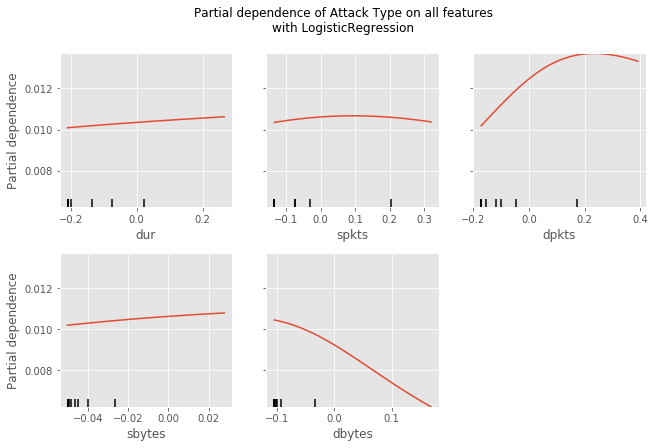

In [66]:
clf_name = models[0][0] # the classifier name
clf = models[0][1] # the classifier itself

features = [0,1,2,3,4]
plot_partial_dependence(estimator=clf, X=X_train_transform, 
                        features=features, feature_names=new_cols,
                        target=1)

fig = plt.gcf() # get current figure (gcf)
fig.suptitle("Partial dependence of Attack Type on all features\n"
              "with {}".format(clf_name))
fig.set_size_inches(10.5, 6.5)
fig.subplots_adjust(hspace=0.3)

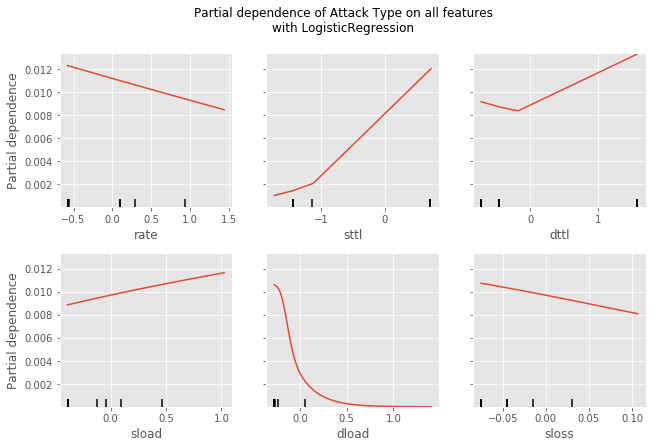

In [67]:
clf_name = models[0][0] # the classifier name
clf = models[0][1] # the classifier itself

features = [5,6,7,8,9,10]
plot_partial_dependence(estimator=clf, X=X_train_transform, 
                        features=features, feature_names=new_cols,
                        target=1)

fig = plt.gcf() # get current figure (gcf)
fig.suptitle("Partial dependence of Attack Type on all features\n"
              "with {}".format(clf_name))
fig.set_size_inches(10.5, 6.5)
fig.subplots_adjust(hspace=0.3)

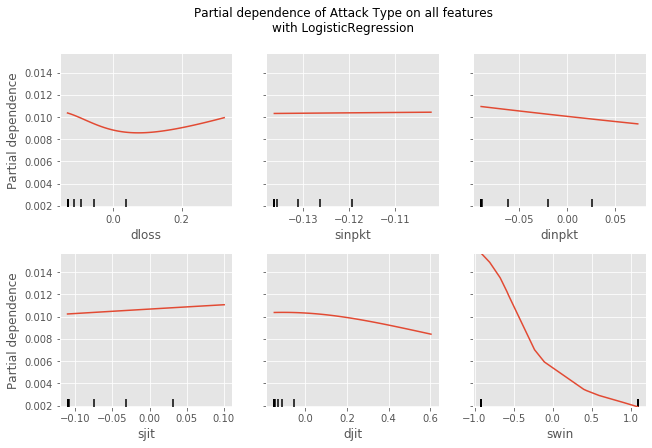

In [68]:
clf_name = models[0][0] # the classifier name
clf = models[0][1] # the classifier itself

features = [11,12,13,14,15,16]
plot_partial_dependence(estimator=clf, X=X_train_transform, 
                        features=features, feature_names=new_cols,
                        target=1)

fig = plt.gcf() # get current figure (gcf)
fig.suptitle("Partial dependence of Attack Type on all features\n"
              "with {}".format(clf_name))
fig.set_size_inches(10.5, 6.5)
fig.subplots_adjust(hspace=0.3)

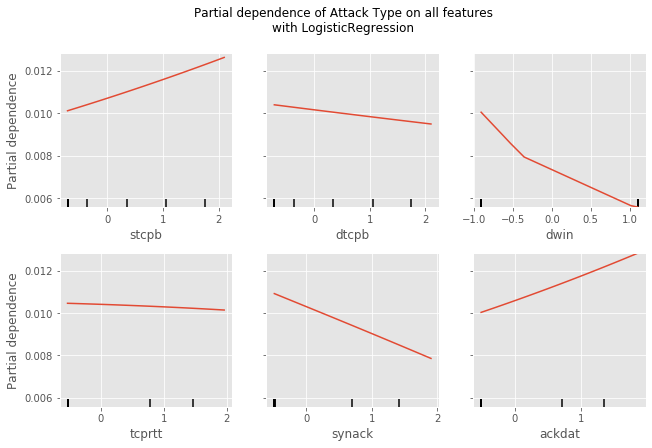

In [69]:
clf_name = models[0][0] # the classifier name
clf = models[0][1] # the classifier itself

features = [17,18,19,20,21,22]
plot_partial_dependence(estimator=clf, X=X_train_transform, 
                        features=features, feature_names=new_cols,
                        target=1)

fig = plt.gcf() # get current figure (gcf)
fig.suptitle("Partial dependence of Attack Type on all features\n"
              "with {}".format(clf_name))
fig.set_size_inches(10.5, 6.5)
fig.subplots_adjust(hspace=0.3)

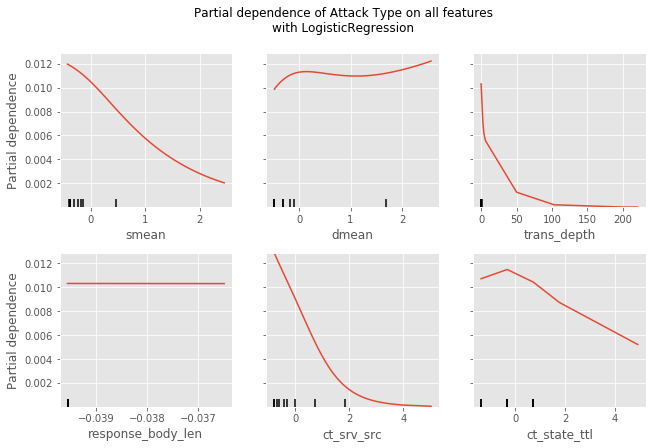

In [70]:
clf_name = models[0][0] # the classifier name
clf = models[0][1] # the classifier itself

features = [23,24,25,26,27,28]
plot_partial_dependence(estimator=clf, X=X_train_transform, 
                        features=features, feature_names=new_cols,
                        target=1)

fig = plt.gcf() # get current figure (gcf)
fig.suptitle("Partial dependence of Attack Type on all features\n"
              "with {}".format(clf_name))
fig.set_size_inches(10.5, 6.5)
fig.subplots_adjust(hspace=0.3)

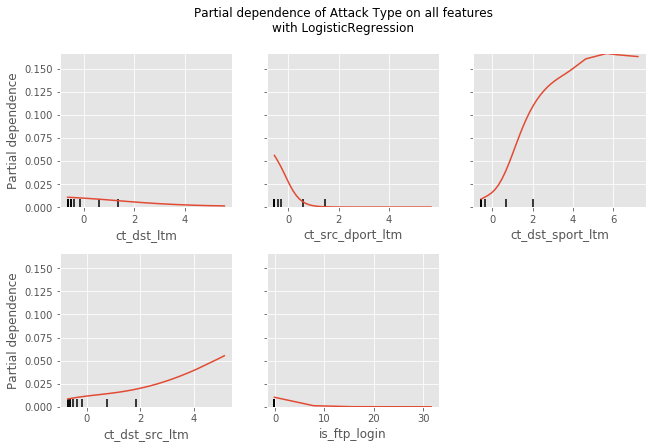

In [71]:
clf_name = models[0][0] # the classifier name
clf = models[0][1] # the classifier itself

features = [29,30,31,32,33]
plot_partial_dependence(estimator=clf, X=X_train_transform, 
                        features=features, feature_names=new_cols,
                        target=1)

fig = plt.gcf() # get current figure (gcf)
fig.suptitle("Partial dependence of Attack Type on all features\n"
              "with {}".format(clf_name))
fig.set_size_inches(10.5, 6.5)
fig.subplots_adjust(hspace=0.3)

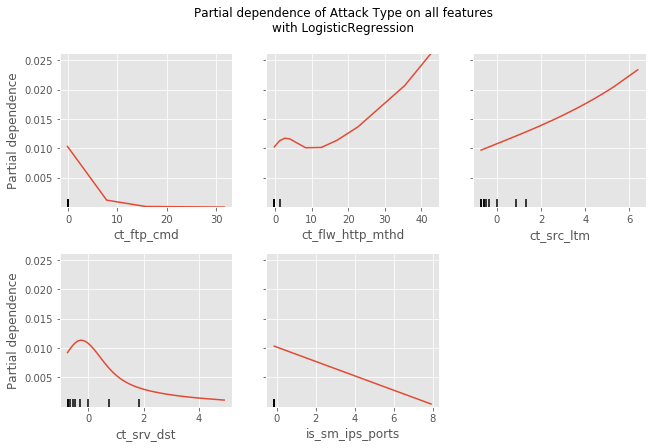

In [72]:
clf_name = models[0][0] # the classifier name
clf = models[0][1] # the classifier itself

features = [34,35,36,37,38]
plot_partial_dependence(estimator=clf, X=X_train_transform, 
                        features=features, feature_names=new_cols,
                        target=1)

fig = plt.gcf() # get current figure (gcf)
fig.suptitle("Partial dependence of Attack Type on all features\n"
              "with {}".format(clf_name))
fig.set_size_inches(10.5, 6.5)
fig.subplots_adjust(hspace=0.3)

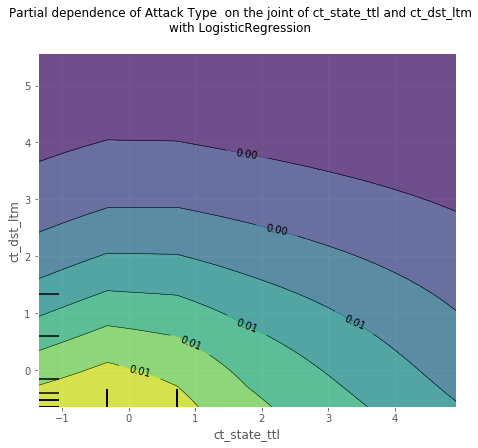

In [55]:
features = [(28, 29)]
plot_partial_dependence(estimator=clf, X=X_train_transform, 
                        features=features, feature_names=new_cols,
                        target=1)

fig = plt.gcf() # get current figure (gcf)
fig.suptitle("Partial dependence of Attack Type  on the joint of ct_state_ttl and ct_dst_ltm\n"
              "with {}".format(clf_name))
fig.set_size_inches(7.5, 6.5)
fig.subplots_adjust(hspace=0.3)
#We can do whatever we want in this code, cause our data features are too many, here just show one instance.

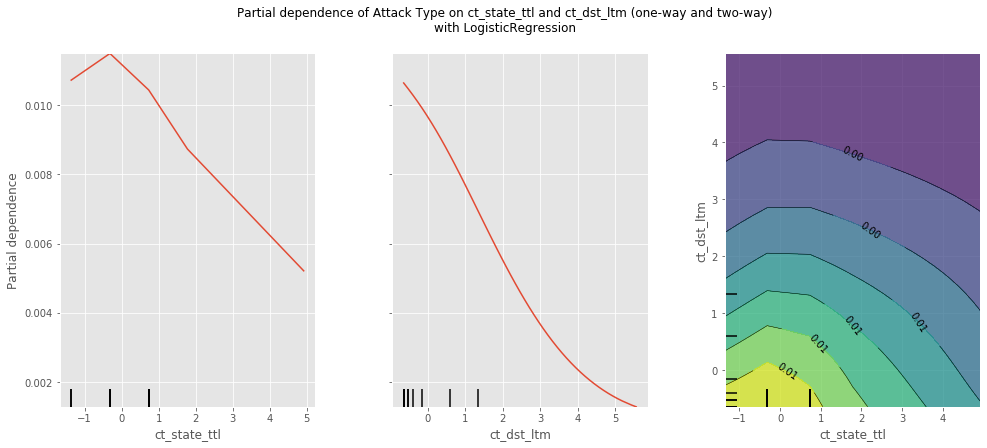

In [57]:
features = [28, 29, (28, 29)]
plot_partial_dependence(estimator=clf, X=X_train_transform, 
                        features=features, feature_names=new_cols,
                        target=1)

fig = plt.gcf() # get current figure (gcf)
fig.suptitle("Partial dependence of Attack Type on ct_state_ttl and ct_dst_ltm (one-way and two-way)\n"
              "with {}".format(clf_name))
fig.set_size_inches(16.5, 6.5)
fig.subplots_adjust(wspace = 0.3, hspace=0.9)

### Example: PDP for RandomTree
Let's plot the effect (one-way and two-way) for `RandomForest`.

In [58]:
models[2]

('RandomForest',
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=None, oob_score=False, random_state=123,
                        verbose=0, warm_start=False))

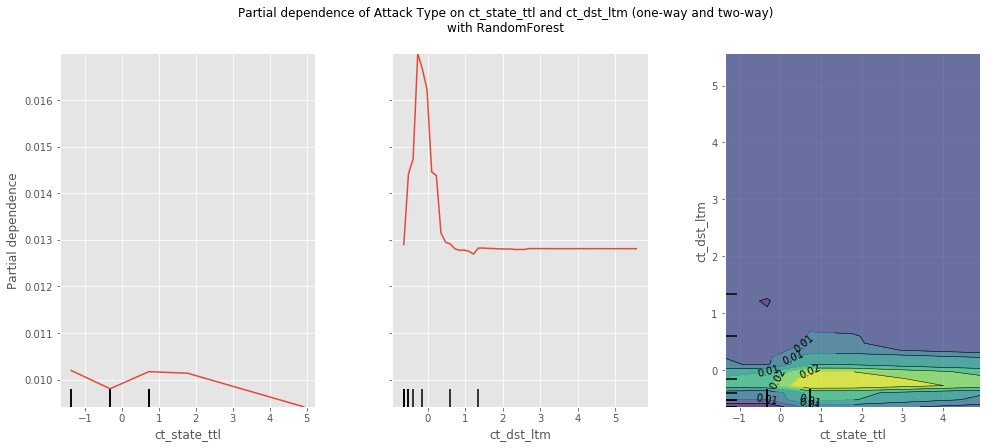

In [59]:
clf_name = models[2][0]
clf = models[2][1]

features = [28, 29, (28, 29)]
plot_partial_dependence(estimator=clf, X=X_train_transform, 
                        features=features, feature_names=new_cols,
                        target=1)

fig = plt.gcf() # get current figure (gcf)
fig.suptitle("Partial dependence of Attack Type on ct_state_ttl and ct_dst_ltm (one-way and two-way)\n"
              "with {}".format(clf_name))
fig.set_size_inches(16.5, 6.5)
fig.subplots_adjust(wspace = 0.3)
#Yuesheng:Maybe choose label(number is 39), the code will be faster, 
#cause label just contain 0 and 1,and random choose another simple feature is ok.

## Permutation Feature Importance 

Previous section shows that Partial Dependence Plots could present how a feature affects predictions. In this section, we focus on another basic question:  What features have the biggest impact on predictions?

This concept is called **feature importance**.

There are multiple ways to measure feature importance. Some approaches answer subtly different versions of the question above. Other approaches have documented shortcomings.

We'll focus on **Permutation Feature Importance**. Compared to most other approaches, Permutation Feature Importance is:

- fast to calculate,
- widely used and understood, and
- consistent with properties we would want a feature importance measure to have.

The Permutation Feature Importance is defined to be the **decrease in a model score** when a single feature value is randomly shuffled. This procedure breaks the relationship between the feature and the target, thus the drop in the model score is indicative of how much the model depends on the feature. 

The above definition might be confused. Here is a clear example to show you how it works: https://www.kaggle.com/dansbecker/permutation-importance

In [60]:
# import permutation function
from sklearn.inspection import permutation_importance

### Example: Permutation Feature Importance for Logistic Regression

#### Permutation Feature Importance on Training Data
Let's first plot the Permutation Feature Importance on **training data** with the trained Logistic Regression . 

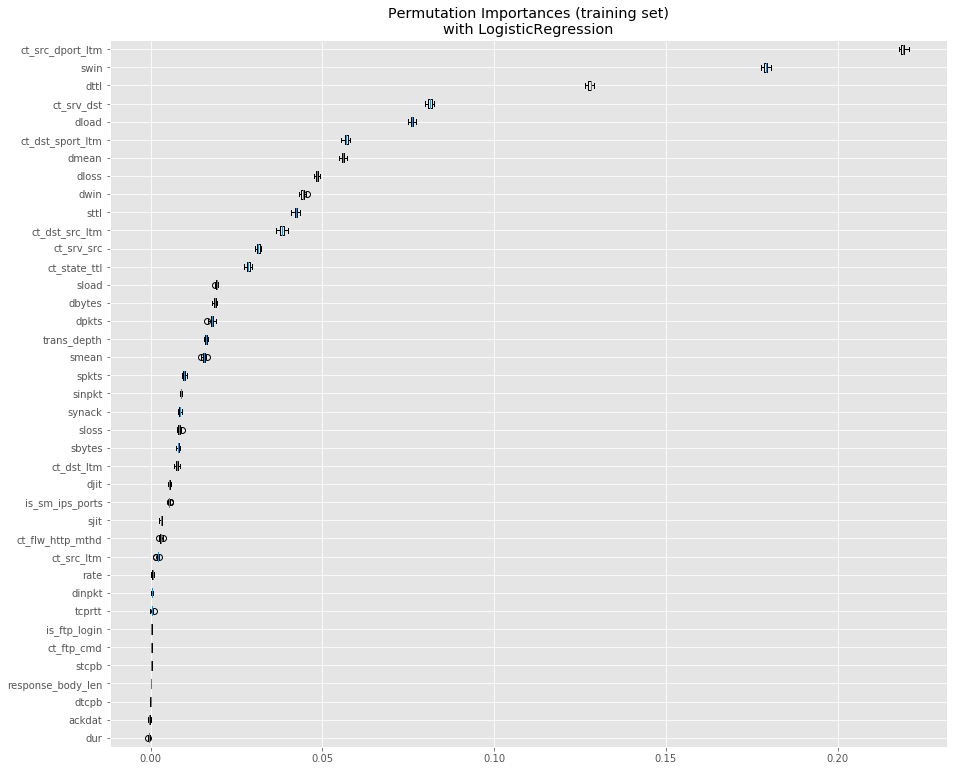

In [64]:
clf_name = models[0][0]
clf = models[0][1]
result = permutation_importance(estimator=clf, 
                                X=X_train_transform, 
                                y=y1_train_transform, 
                                scoring="accuracy",
                                n_repeats=50,
                                random_state=123)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()

ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=np.array(new_cols)[sorted_idx])
ax.set_title("Permutation Importances (training set)\n"
            "with {}".format(clf_name))

fig.set_size_inches(15, 13)
plt.show()

**Interpretation**

- The values towards the top are the most important features, and those towards the bottom matter least.

- The values show how much model performance decreased with a random shuffling (in this case, using `accuracy` as the performance metric).

The above plot shows that `ct_src_dport_itm` is the most important feature in the Logistic Regression model because once we shuffle the `ct_src_dport_itm`` column of the training data, leaving the target and all other columns in place, the **decrease** of the `accuracy` score of predictions is around 0.23. This is significant finding.

#### Permutation Feature Importance on Hold-out Testing Data

Permutation importances can either be computed on the training set or an held-out testing or validation set. 
- Using a held-out set makes it possible to highlight which features contribute the most to the generalization power of the inspected model. 

- Features that are important on the training set but not on the held-out set might cause the model to overfit.

Let's plot the Permutation Feature Importance on **hold-out testing data**

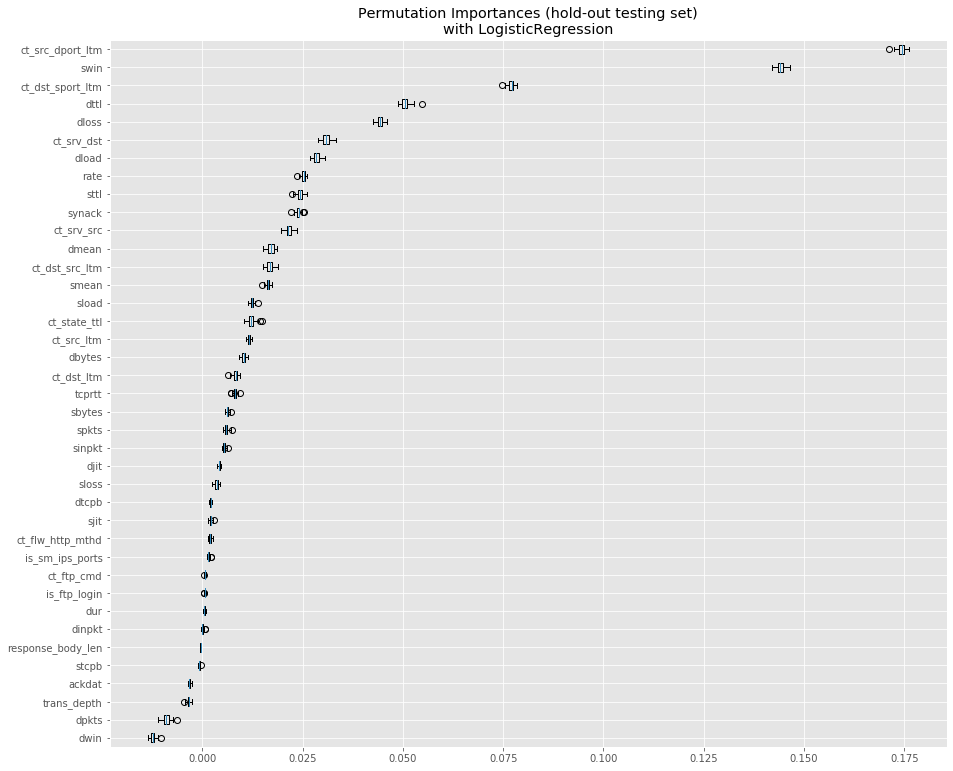

In [65]:
result = permutation_importance(estimator=clf, 
                                X=X_test_transform, 
                                y=y1_test_transform, 
                                scoring="accuracy",
                                n_repeats=50,
                                random_state=123)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()

ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=np.array(new_cols)[sorted_idx])
ax.set_title("Permutation Importances (hold-out testing set)\n"
            "with {}".format(clf_name))
fig.set_size_inches(15, 13)

plt.show()